In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [23]:
aigen5_zeroshot = pd.read_csv('summary_aigen5_zeroshot.csv')
df_aigen5_zeroshot = aigen5_zeroshot[['APIs', 'F1 Score']]
df_aigen5_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.98
1,CREATE_CALENDAR_EVENT,0.62
2,CREATE_REMINDER,0.99
3,GENERATE_IMAGE,0.94
4,GET_CALENDAR_EVENTS,0.81
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,0.99
7,GET_NEWS,0.84
8,GET_WEATHER,0.98
9,NOT_AVAILABLE,0.93


In [24]:
aigen13_zeroshot = pd.read_csv('summary_aigen13_zeroshot.csv')
df_aigen13_zeroshot = aigen13_zeroshot[['APIs', 'F1 Score']]
df_aigen13_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,1.00
1,CREATE_CALENDAR_EVENT,0.57
2,CREATE_REMINDER,1.00
3,GENERATE_IMAGE,0.98
4,GET_CALENDAR_EVENTS,0.88
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,0.89
8,GET_WEATHER,1.00
9,NOT_AVAILABLE,0.77


In [25]:
sparksofagi_zeroshot = pd.read_csv('summary_sparksofagi_zeroshot.csv')
df_sparksofagi_zeroshot = sparksofagi_zeroshot[['APIs', 'F1 Score']]
df_sparksofagi_zeroshot

,APIs,F1 Score
0,CONVERT_TEXT_TO_SPEECH,0.95
1,CREATE_CALENDAR_EVENT,0.78
2,CREATE_REMINDER,0.94
3,GENERATE_IMAGE,1.00
4,GET_CALENDAR_EVENTS,0.79
5,GET_CURRENT_DATE_AND_TIME,1.00
6,GET_CURRENT_STOCK_PRICE,1.00
7,GET_NEWS,1.00
8,GET_WEATHER,0.97
9,NOT_AVAILABLE,0.72


In [26]:
# Read CSV files and extract relevant columns and set 'user_prompt' as index
def read_and_process(filename, model_name):
    df = pd.read_csv(filename)[['APIs', 'F1 Score']]
    df.set_index('APIs', inplace=True)
    df.columns = [model_name]
    return df

In [27]:
# GPT-4 dt
GPT4_aigen13_zeroshot_df = read_and_process('summary_aigen13_zeroshot.csv', 'GPT4_AIg13_zshot')
GPT4_sparksofagi_zeroshot_df = read_and_process('summary_sparksofagi_zeroshot.csv', 'GPT4_Spark_zshot')
GPT4_aigen5_zeroshot_df = read_and_process('summary_aigen5_zeroshot.csv', 'GPT4_AIg_5_zshot')

# GPT-4 dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([GPT4_aigen13_zeroshot_df, GPT4_sparksofagi_zeroshot_df, GPT4_aigen5_zeroshot_df], axis=1)

# GPT-4 dt Compute the average across columns for each row
GPT4_average_df = dfs_combined.mean(axis=1).to_frame(name="GPT4 avg. F1 Score").round(2)


# Palm dt
Palm_aigen13_zeroshot_df = read_and_process('summary_palm_using_aigen13_zeroshot.csv', 'Palm_AIg13_zshot')
Palm_sparksofagi_zeroshot_df = read_and_process('summary_palm_using_sparksofagi.csv', 'Palm_Spark_zshot')
Palm_aigen5_zeroshot_df = read_and_process('summary_palm_using_aigen5_zeroshot.csv', 'Palm_AIg_5_zshot')

# Palm dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([Palm_aigen13_zeroshot_df, Palm_sparksofagi_zeroshot_df, Palm_aigen5_zeroshot_df], axis=1)

# Palm dt Compute the average across columns for each row
Palm_average_df = dfs_combined.mean(axis=1).to_frame(name="Palm avg. F1 Score").round(2)

# Llama2 dt 
Llama2_aigen13_zeroshot_df = read_and_process('summary_llama2_using_aigen13_zeroshot.csv', 'Llama2_AIg13_zshot')
Llama2_sparksofagi_zeroshot_df = read_and_process('summary_llama2_using_sparksofagi.csv', 'Llama2_Spark_zshot')
Llama2_aigen5_zeroshot_df = read_and_process('summary_llama2_using_aigen13_zeroshot.csv', 'Llama2_AIg_5_zshot') 

# Palm dt Concatenate the DataFrames along the columns axis
dfs_combined = pd.concat([Llama2_aigen13_zeroshot_df, Llama2_sparksofagi_zeroshot_df, Llama2_aigen5_zeroshot_df], axis=1)

# Palm dt Compute the average across columns for each row
Llama2_average_df = dfs_combined.mean(axis=1).to_frame(name="Llama2 avg. F1 Score").round(2)




In [28]:
# Concatenate DataFrames side by side
df = pd.concat([GPT4_aigen13_zeroshot_df, GPT4_sparksofagi_zeroshot_df, GPT4_aigen5_zeroshot_df, Palm_aigen5_zeroshot_df, Palm_aigen13_zeroshot_df, Palm_sparksofagi_zeroshot_df, Llama2_aigen13_zeroshot_df, Llama2_sparksofagi_zeroshot_df, Llama2_aigen5_zeroshot_df, GPT4_average_df, Palm_average_df, Llama2_average_df], axis=1)#, aigen2_oneshot_df, autogpt_zeroshot_df, aigen5_oneshot_df], axis=1)
final_df_transposed = df
df.head()

,GPT4_AIg13_zshot,GPT4_Spark_zshot,GPT4_AIg_5_zshot,Palm_AIg_5_zshot,Palm_AIg13_zshot,Palm_Spark_zshot,Llama2_AIg13_zshot,Llama2_Spark_zshot,Llama2_AIg_5_zshot,GPT4 avg. F1 Score,Palm avg. F1 Score,Llama2 avg. F1 Score
APIs,,,,,,,,,,,,
CONVERT_TEXT_TO_SPEECH,1.00,0.95,0.98,0.85,0.12,0.0,0.1,0.0,0.1,0.98,0.32,0.07
CREATE_CALENDAR_EVENT,0.57,0.78,0.62,0.31,0.24,0.0,0.0,0.0,0.0,0.66,0.18,0.00
CREATE_REMINDER,1.00,0.94,0.99,0.85,0.10,0.0,0.0,0.0,0.0,0.98,0.32,0.00
GENERATE_IMAGE,0.98,1.00,0.94,0.52,0.06,0.0,0.0,0.0,0.0,0.97,0.19,0.00
GET_CALENDAR_EVENTS,0.88,0.79,0.81,0.48,0.03,0.0,0.0,0.0,0.0,0.83,0.17,0.00


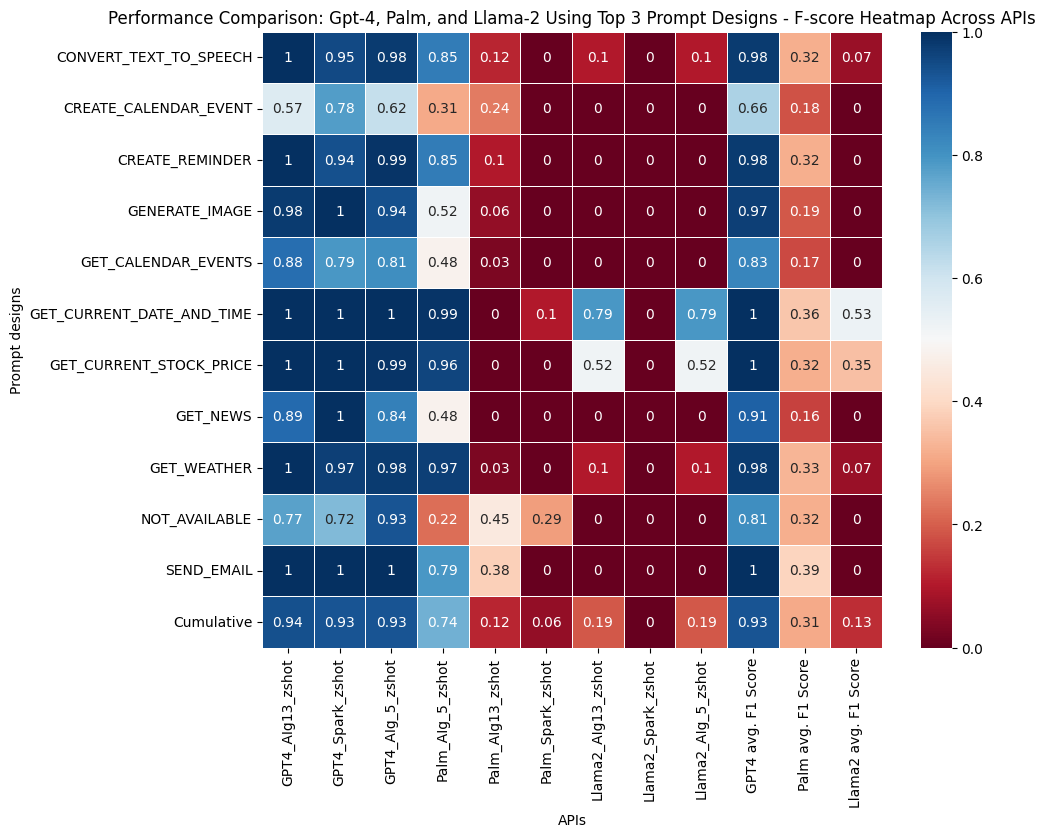

In [29]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_df_transposed, annot=True, cmap="RdBu", linewidths=0.5)
ax.set_ylabel('Prompt designs')
ax.set_xlabel('APIs')
plt.title('Performance Comparison: Gpt-4, Palm, and Llama-2 Using Top 3 Prompt Designs - F-score Heatmap Across APIs')
plt.show()

In [30]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pingouin as pg

# I assume you have your dataset loaded in some variable, 'dataset'
dataset = aigen5_zeroshot
transposed_dataset = dataset.T

# Rename the transposed dataframe's columns to match the original structure
transposed_dataset.columns = transposed_dataset.iloc[0]
transposed_dataset = transposed_dataset.drop('APIs')

# Melt the transposed dataframe
df_melted = pd.melt(transposed_dataset.reset_index(), id_vars=['index'], var_name='APIs', value_name='Value')

# Rename the 'index' column to 'Metrics'
df_melted = df_melted.rename(columns={'index': 'Metrics'})


# Perform ANOVA for each metric
for metric in df_melted['Metrics'].unique():
    subset = df_melted[df_melted['Metrics'] == metric]
    results = ols('Value ~ C(APIs)', data=subset).fit()
    anova_table = sm.stats.anova_lm(results, typ=2)
    print(f"ANOVA table for {metric}:")
    print(anova_table)




ValueError: endog has evaluated to an array with multiple columns that has shape (12, 6). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
# Check for non-numeric data in 'Value' column
non_numeric = df_melted[~df_melted['Value'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pingouin as pg

# I assume you have your dataset loaded in some variable, 'dataset'
dataset = aigen5_zeroshot
transposed_dataset = dataset.T


# Convert the 'Value' column to numeric
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

# Handle any potential conversion errors (e.g., NaN values after conversion)
df_melted = df_melted.dropna(subset=['Value'])

# Perform ANOVA for each metric
for metric in df_melted['Metrics'].unique():
    subset = df_melted[df_melted['Metrics'] == metric]
    anova_results = pg.anova(data=subset, dv='Value', between='APIs', detailed=True)
    print(f"ANOVA table for {metric}:")
    print(anova_results)

ANOVA table for TN:
   Source        SS  DF            MS  np2
0    APIs  195292.0  11  17753.818182  1.0
1  Within       0.0   0           NaN  NaN
ANOVA table for FN:
   Source          SS  DF         MS  np2
0    APIs  638.666667  11  58.060606  1.0
1  Within    0.000000   0        NaN  NaN
ANOVA table for FP:
   Source           SS  DF          MS  np2
0    APIs  2822.666667  11  256.606061  1.0
1  Within     0.000000   0         NaN  NaN
ANOVA table for TP:
   Source             SS  DF            MS  np2
0    APIs  210224.666667  11  19111.333333  1.0
1  Within       0.000000   0           NaN  NaN
ANOVA table for Precision:
   Source        SS  DF        MS  np2
0    APIs  0.260892  11  0.023717  1.0
1  Within  0.000000   0       NaN  NaN
ANOVA table for Recall:
   Source      SS  DF        MS  np2
0    APIs  0.0697  11  0.006336  1.0
1  Within  0.0000   0       NaN  NaN
ANOVA table for F1 Score:
   Source        SS  DF       MS  np2
0    APIs  0.138825  11  0.01262  1.0
1  Withi

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:1005: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:1005: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:1005: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:1005: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pingouin/parametric.py:1005: RuntimeWarning: invalid value encountered in scalar divide
  mserror = sserror / ddof2
/Library/Frameworks/

In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import f_oneway



In [ ]:
aigen13_f1_scores = np.array([1.00, 0.57, 1.00, 0.98, 0.88, 1.00, 1.00, 0.89, 1.00, 0.77, 1.00, 0.94])
palm_f1_scores = np.array([0.12, 0.24, 0.10, 0.06, 0.03, 0.00, 0.00, 0.00, 0.03, 0.45, 0.38, 0.12])
llama2_f1_scores = np.array([0.10, 0.00, 0.00, 0.00, 0.00, 0.79, 0.48, 0.00, 0.00, 0.00, 0.00, 0.17])


In [ ]:
f_stat, p_value = f_oneway(aigen13_f1_scores, palm_f1_scores, llama2_f1_scores)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 72.53873780300476
P-value: 8.325909076383212e-13


In [ ]:
import pandas as pd

data = {
    'Model': ['aigen13'] * 12 + ['palm'] * 12 + ['llama2'] * 12,
    'F1-Score': [1.00, 0.57, 1.00, 0.98, 0.88, 1.00, 1.00, 0.89, 1.00, 0.77, 1.00, 0.94] +
                [0.12, 0.24, 0.10, 0.06, 0.03, 0.00, 0.00, 0.00, 0.03, 0.45, 0.38, 0.12] +
                [0.10, 0.00, 0.00, 0.00, 0.00, 0.79, 0.48, 0.00, 0.00, 0.00, 0.00, 0.17]
}

df = pd.DataFrame(data)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(df['F1-Score'], df['Model'], alpha=0.05)
print(result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
aigen13 llama2  -0.7908    0.0  -0.977 -0.6047   True
aigen13   palm  -0.7917    0.0 -0.9778 -0.6055   True
 llama2   palm  -0.0008 0.9999  -0.187  0.1853  False
-----------------------------------------------------
